In [1]:
# Automatically update imports
%load_ext autoreload
%autoreload 2

# Workaround for some autocomplete bug
%config Completer.use_jedi = False

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data import train
from data import y, X, categorical, numerical

# Check Data

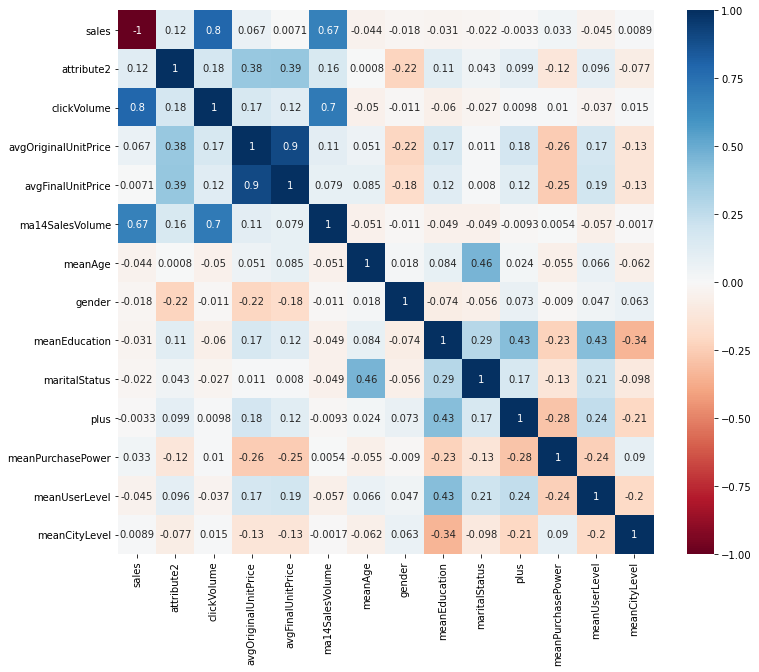

In [3]:
import seaborn as sns

cols = [y, *numerical] # Select numerical columns
corr = train[cols].corr()

# Lousy hack to get heatmap colours working
corr.iloc[0, 0] = -1.0 
corr.iloc[-1, -1] = 1.0 

# Plot correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=corr, cmap='RdBu');

# Grid Search to tune hyperparameters

In [ ]:
from multiprocessing import cpu_count
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(
    estimator = SVR(),
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': np.logspace(-5, 5, 5),
    },
    cv = 5, # 5-fold cross validation
    n_jobs = cpu_count() - 1,
    return_train_score = True,
    verbose = True,
)

model.fit(train[X], train[y])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Extract grid search results into dataframe
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.drop(columns='params')

# Set parameter grid as index
columns = results.columns
params = columns[columns.str.match('param_')]
results = results.set_index(list(params))

results